In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
resorts = pd.read_csv('data/resorts.csv', encoding = 'latin-1')

In [14]:
resorts

,ID,Resort,Latitude,Longitude,Country,Continent,Price,Season,Highest point,Lowest point,...,Snow cannons,Surface lifts,Chair lifts,Gondola lifts,Total lifts,Lift capacity,Child friendly,Snowparks,Nightskiing,Summer skiing
0,1,Hemsedal,60.928244,8.383487,Norway,Europe,46,November - May,1450,620,...,325,15,6,0,21,22921,Yes,Yes,Yes,No
1,2,Geilosiden Geilo,60.534526,8.206372,Norway,Europe,44,November - April,1178,800,...,100,18,6,0,24,14225,Yes,Yes,Yes,No
2,3,Golm,47.057810,9.828167,Austria,Europe,48,December - April,2110,650,...,123,4,4,3,11,16240,Yes,No,No,No
3,4,Red Mountain Resort-Rossland,49.105520,-117.846280,Canada,North America,60,December - April,2075,1185,...,0,2,5,1,8,9200,Yes,Yes,Yes,No
4,5,Hafjell,61.230369,10.529014,Norway,Europe,45,November - April,1030,195,...,150,14,3,1,18,21060,Yes,Yes,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,495,Puigmal,42.395007,2.108883,France,Europe,0,Unknown,2700,1830,...,0,11,2,0,13,11865,Yes,No,No,No
495,496,Kranzberg-Mittenwald,47.451359,11.228630,Germany,Europe,29,December,1350,980,...,8,9,1,0,10,5850,Yes,Yes,Yes,No
496,497,Wetterstein lifts-Wettersteinbahnen- Ehrwald,47.406897,10.927998,Austria,Europe,43,December - March,1530,1000,...,33,6,4,0,10,5425,Yes,Yes,No,No
497,498,Stuhleck-Spital am Semmering,47.574195,15.789964,Austria,Europe,42,April,1774,777,...,240,7,2,0,9,14400,Yes,Yes,Yes,No


In [22]:
resorts.describe()

,ID,Latitude,Longitude,Price,Highest point,Lowest point,Beginner slopes,Intermediate slopes,Difficult slopes,Total slopes,Longest run,Snow cannons,Surface lifts,Chair lifts,Gondola lifts,Total lifts,Lift capacity
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,250.000000,43.205684,-6.006784,48.721443,2160.589178,1200.631263,31.819639,37.921844,16.164329,85.905812,3.545090,179.136273,11.282565,9.721443,3.258517,24.262525,31650.961924
std,144.193157,15.975790,59.990459,21.718733,774.339805,596.142294,47.401764,44.358524,20.115855,100.874157,3.947887,372.321111,13.365360,11.461502,5.867967,27.672736,40781.986019
min,1.000000,-45.054960,-149.740657,0.000000,163.000000,36.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,125.500000,43.672650,1.380975,36.000000,1594.000000,800.000000,10.000000,12.000000,3.000000,30.000000,0.000000,0.000000,3.000000,3.000000,0.000000,10.000000,11645.000000
50%,250.000000,46.347316,8.206372,45.000000,2175.000000,1121.000000,18.000000,25.000000,9.000000,55.000000,3.000000,15.000000,7.000000,6.000000,1.000000,15.000000,18510.000000
75%,374.500000,47.327089,12.429237,54.000000,2700.000000,1500.000000,30.000000,45.000000,21.000000,100.000000,6.000000,180.000000,14.000000,11.500000,4.000000,26.000000,32829.000000
max,499.000000,67.784406,176.876668,141.000000,3914.000000,3286.000000,312.000000,239.000000,126.000000,600.000000,16.000000,2383.000000,89.000000,74.000000,40.000000,174.000000,252280.000000


In [16]:
resorts.loc[resorts.Price == 0]

,ID,Resort,Latitude,Longitude,Country,Continent,Price,Season,Highest point,Lowest point,...,Snow cannons,Surface lifts,Chair lifts,Gondola lifts,Total lifts,Lift capacity,Child friendly,Snowparks,Nightskiing,Summer skiing
195,196,Perisher,-36.396167,148.408582,Australia,Oceania,0,June - October,1605,1125,...,271,34,14,1,49,46975,Yes,Yes,Yes,Yes
234,235,Yellowstone Club,45.668198,-111.067446,United States,North America,0,November - April,3005,2182,...,0,4,11,0,15,14886,Yes,No,No,No
334,335,Pragelato,45.016217,6.942453,Italy,Europe,0,December - April,2700,1335,...,0,4,1,0,5,3660,Yes,No,No,No
348,349,Uludag?-Bursa,40.070529,29.222010,Turkey,Asia,0,Unknown,1767,395,...,0,8,6,2,16,19637,Yes,Yes,No,No
368,369,Palando?ken-Ejder 3200 World Ski Center-,39.543016,42.915247,Turkey,Asia,0,November - April,3176,2200,...,0,3,11,2,16,15390,Yes,Yes,Yes,No
386,387,High1 Resort,37.207294,128.824816,South Korea,Asia,0,December - April,1367,690,...,0,1,6,4,11,26685,Yes,No,No,No
389,390,Alpika Service,43.667196,40.246821,Russia,Europe,0,December - April,2228,535,...,0,1,1,7,9,18120,Yes,No,No,No
474,475,Sun Mountain-Yabuli,44.929398,128.604393,China,Asia,0,November - April,1375,457,...,0,4,2,0,6,13776,Yes,No,No,No
494,495,Puigmal,42.395007,2.108883,France,Europe,0,Unknown,2700,1830,...,0,11,2,0,13,11865,Yes,No,No,No


In [27]:
resorts = resorts.loc[resorts.Price != 0]

In [41]:
resorts.loc[resorts['Beginner slopes'] == 0]

,ID,Resort,Latitude,Longitude,Country,Continent,Price,Season,Highest point,Lowest point,...,Snow cannons,Surface lifts,Chair lifts,Gondola lifts,Total lifts,Lift capacity,Child friendly,Snowparks,Nightskiing,Summer skiing
87,88,Aspen Mountain,39.176099,-106.829206,United States,North America,124,November - April,3418,2422,...,0,0,7,1,8,13400,Yes,No,No,No
99,100,Elfer Neustift,47.106469,11.307983,Austria,Europe,29,December - March,2080,981,...,0,3,0,1,4,2980,Yes,No,No,No
403,404,Wendelstein-Brannenburg-?Osterhofen,49.355942,11.144105,Germany,Europe,35,December - March,1723,791,...,0,2,0,2,4,3250,Yes,No,No,No
478,479,Diavolezza-?Lagalb,46.429214,9.977345,Switzerland,Europe,59,"October - November, December - May, June - Oct...",3006,2091,...,20,9,2,0,11,3970,Yes,No,No,Yes


In [42]:
resorts.loc[resorts['Intermediate slopes'] == 0]

,ID,Resort,Latitude,Longitude,Country,Continent,Price,Season,Highest point,Lowest point,...,Snow cannons,Surface lifts,Chair lifts,Gondola lifts,Total lifts,Lift capacity,Child friendly,Snowparks,Nightskiing,Summer skiing
6,7,Porter,-39.670988,176.876668,New Zealand,Oceania,61,June - September,1980,1300,...,0,5,1,0,6,5600,No,No,No,Yes
8,9,Hochschwarzeck,47.628373,12.920528,Germany,Europe,22,December - April,1385,1030,...,0,3,1,0,4,2880,Yes,No,No,No
64,65,La Grave - La Meije,45.045453,6.306722,France,Europe,49,December - April,3534,1470,...,0,1,0,2,3,1460,Yes,No,No,No
204,205,Oberau (Wildscho?nau),47.423497,12.030743,Austria,Europe,30,December - March,1130,900,...,0,2,0,0,2,1932,Yes,No,No,No
426,427,Indoor ski area Snow Arena-Druskininkai,54.031730,23.960042,Lithuania,Europe,29,Year-round,163,97,...,16,4,1,0,5,2800,Yes,Yes,Yes,Yes


In [43]:
resorts.loc[resorts['Difficult slopes'] == 0]

,ID,Resort,Latitude,Longitude,Country,Continent,Price,Season,Highest point,Lowest point,...,Snow cannons,Surface lifts,Chair lifts,Gondola lifts,Total lifts,Lift capacity,Child friendly,Snowparks,Nightskiing,Summer skiing
8,9,Hochschwarzeck,47.628373,12.920528,Germany,Europe,22,December - April,1385,1030,...,0,3,1,0,4,2880,Yes,No,No,No
9,10,Rossfeld - Berchtesgaden - Oberau,47.651306,13.058977,Germany,Europe,20,December - April,1554,1300,...,0,4,0,0,4,3229,Yes,Yes,Yes,No
22,23,Howelsen Hill-Steamboat Springs,40.480533,-106.840605,United States,North America,21,November - April,2175,2040,...,0,3,1,0,4,2220,No,No,No,No
38,39,Reither Kogel-Reith im Alpbachtal,47.400542,11.860118,Austria,Europe,46,December - March,1280,670,...,0,4,0,1,5,4070,Yes,No,Yes,No
55,56,Fonna Glacier,60.216882,6.435787,Norway,Europe,42,May - September,1460,1200,...,0,1,0,0,1,1200,Yes,Yes,No,Yes
63,64,Pont d'Espagne - Cauterets,42.851011,-0.139921,France,Europe,35,November - April,1756,1516,...,0,2,1,1,4,4150,Yes,No,No,No
64,65,La Grave - La Meije,45.045453,6.306722,France,Europe,49,December - April,3534,1470,...,0,1,0,2,3,1460,Yes,No,No,No
76,77,Balme-?Les Autannes-Vallorcine-?Le Tour,46.285683,4.780410,France,Europe,51,December - April,2270,1453,...,0,8,2,2,12,14860,Yes,Yes,No,No
99,100,Elfer Neustift,47.106469,11.307983,Austria,Europe,29,December - March,2080,981,...,0,3,0,1,4,2980,Yes,No,No,No
146,147,Buchenberg-Buching-Halblech-,47.606423,10.810675,Germany,Europe,25,December - March,1140,810,...,0,2,1,0,3,2800,Yes,No,No,No


In [47]:
resorts.loc[resorts['Longest run'] == 0]

,ID,Resort,Latitude,Longitude,Country,Continent,Price,Season,Highest point,Lowest point,...,Snow cannons,Surface lifts,Chair lifts,Gondola lifts,Total lifts,Lift capacity,Child friendly,Snowparks,Nightskiing,Summer skiing
5,6,Voss,60.683706,6.407905,Norway,Europe,43,November - May,960,284,...,40,7,4,0,11,11900,Yes,Yes,No,No
6,7,Porter,-39.670988,176.876668,New Zealand,Oceania,61,June - September,1980,1300,...,0,5,1,0,6,5600,No,No,No,Yes
8,9,Hochschwarzeck,47.628373,12.920528,Germany,Europe,22,December - April,1385,1030,...,0,3,1,0,4,2880,Yes,No,No,No
15,16,Treble Cone,-44.632375,168.872825,New Zealand,Oceania,68,June - October,1960,1260,...,32,2,2,0,4,4520,No,Yes,No,Yes
18,19,Les Gets (Les Portes du Soleil),46.155098,6.663331,France,Europe,51,December - April,2466,1000,...,1074,89,74,11,174,252280,Yes,Yes,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,489,Kaiseregg-?Riggisalp-Schwarzsee,46.652497,7.319056,Switzerland,Europe,34,December - March,1750,1050,...,46,11,3,1,15,5790,Yes,Yes,Yes,No
489,490,St. Pierre de Chartreuse-Le Planolet,45.342269,5.814686,France,Europe,21,December - April,1800,900,...,35,3,2,0,5,12610,Yes,No,No,No
490,491,Loon Mountain,44.516452,-74.649625,United States,North America,73,November - April,930,300,...,0,2,9,1,12,17034,Yes,Yes,No,No
492,493,Mo?nichkirchen-?Mariensee,47.523531,15.998682,Austria,Europe,35,March,1450,870,...,80,3,3,0,6,6741,Yes,Yes,No,No


array([[<Axes: title={'center': 'Longest run'}>]], dtype=object)

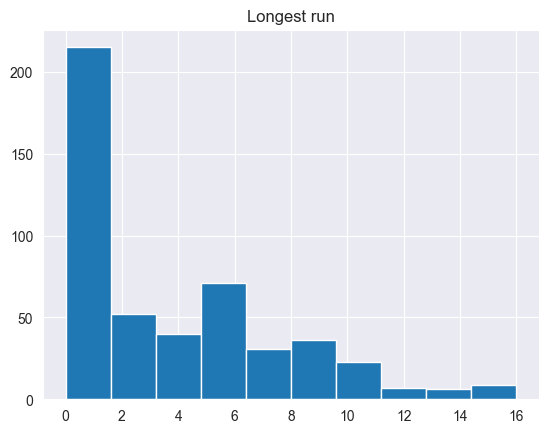

In [50]:
resorts.loc[:, ['Longest run']].hist()

<Axes: xlabel='Longest run', ylabel='Total lifts'>

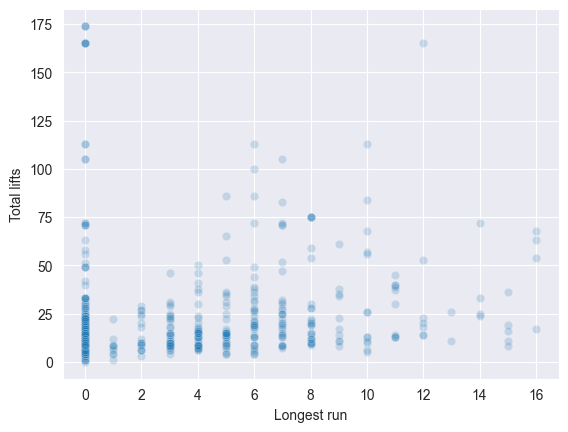

In [61]:
sns.scatterplot(resorts, x = 'Longest run', y = 'Total lifts', alpha = .2)

In [68]:
resorts.loc[resorts['Total lifts'] == 0]

,ID,Resort,Latitude,Longitude,Country,Continent,Price,Season,Highest point,Lowest point,...,Snow cannons,Surface lifts,Chair lifts,Gondola lifts,Total lifts,Lift capacity,Child friendly,Snowparks,Nightskiing,Summer skiing
233,234,Mzaar Kfardebian,33.972129,35.839567,Lebanon,Asia,51,Unknown,2465,1850,...,0,0,0,0,0,0,Yes,No,No,No


In [71]:
resorts.drop(233, inplace = True)

C:\Users\theru\AppData\Local\Temp\ipykernel_18244\3409047095.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  resorts.drop(233, inplace = True)


In [72]:
resorts.loc[resorts['Lift capacity'] == 0]

,ID,Resort,Latitude,Longitude,Country,Continent,Price,Season,Highest point,Lowest point,...,Snow cannons,Surface lifts,Chair lifts,Gondola lifts,Total lifts,Lift capacity,Child friendly,Snowparks,Nightskiing,Summer skiing
50,51,Ben Lomond,-30.023715,151.659179,Australia,Oceania,47,July - September,1572,1460,...,0,0,7,0,7,0,Yes,No,No,Yes
299,300,Oppdal,62.535178,9.623304,Norway,Europe,44,Unknown,1300,585,...,0,1,0,0,1,0,Yes,No,No,No


<Axes: xlabel='Total lifts', ylabel='Lift capacity'>

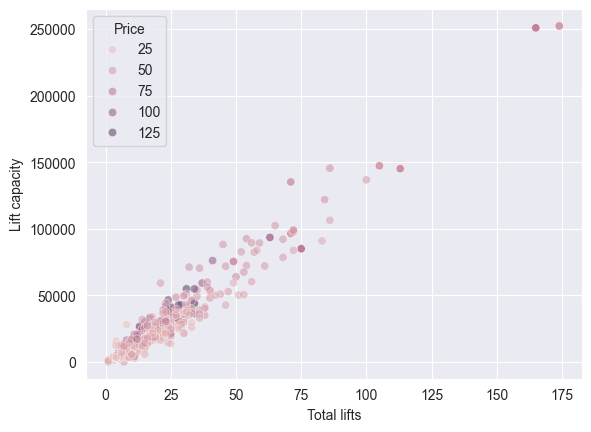

In [80]:
sns.scatterplot(data = resorts, x = 'Total lifts', y = 'Lift capacity', hue = 'Price', alpha = .5)